In [52]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchviz import make_dot  # Assuming torchviz is installed for visualizing
import nbimporter
from MultiImageSteganography import *


In [53]:
# Define paths to your custom images
# cover_image_path = 'images/test_11.jpeg'
# secret_image_1_path = 'images/test_8.jpeg'
# secret_image_2_path = 'images/test_9.jpeg'
# secret_image_3_path = 'images/test_10.jpeg'
cover_image_path = 'images/DSC_4569.jpg'
secret_image_1_path = 'images/DSC_4575.jpg'
secret_image_2_path = 'images/DSC_4583.jpg'
secret_image_3_path = 'images/DSC_4602.jpg'

# Load images using PIL
cover_image = Image.open(cover_image_path)
secret_image_1 = Image.open(secret_image_1_path)
secret_image_2 = Image.open(secret_image_2_path)
secret_image_3 = Image.open(secret_image_3_path)


In [54]:
# Define transformations to match your model's input requirements
transform = transforms.Compose([
    transforms.Resize((1000,1000)),   # Adjust dimensions as per model input
    # transforms.Resize((128,128)),   # Adjust dimensions as per model input
    transforms.ToTensor(),           # Convert PIL image to Tensor
    # transforms.Normalize((0.5,), (0.5,))  # Normalize; adjust if model requires different values
])

# Apply transformations
cover_image = transform(cover_image).unsqueeze(0)         # Add batch dimension
secret_image_1 = transform(secret_image_1).unsqueeze(0)
secret_image_2 = transform(secret_image_2).unsqueeze(0)
secret_image_3 = transform(secret_image_3).unsqueeze(0)


In [55]:
device = torch.device('cpu')  # or 'cuda' if you have a GPU and want to use it

cover_image = cover_image.to(device)
secret_image_1 = secret_image_1.to(device)
secret_image_2 = secret_image_2.to(device)
secret_image_3 = secret_image_3.to(device)


In [56]:
model = torch.load('./models/model_1000.pkl', map_location=device)
model.eval()

C:\Users\sapta\AppData\Local\Temp\ipykernel_16124\752447689.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./models/model_1000.pkl', map_location=de

SteganoModel(
  (encoder): Encoder(
    (prep_network1): PrepNetwork1(
      (conv1): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (conv4): Conv2d(65, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv5): Conv2d(65, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv6): Conv2d(65, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    )
    (prep_network2): PrepNetwork2(
      (conv1): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (conv4): Conv2d(65, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv5): Conv2d(65, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      

In [ ]:
# Encode and decode images
import torch
with torch.no_grad():
    hidden_image, reveal_image_1, reveal_image_2, reveal_image_3 = model(
        cover_image,
        secret_image_1,
        secret_image_2,
        secret_image_3,
        secret_image_3,
        mode='full'
    )

# Visualize the hidden image computation graph
# make_dot(hidden_image).render('hidden_image', format='png')

# Optionally, save or display the results using torchvision or PIL
# Here is an example of displaying the hidden image using matplotlib (optional)
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Convert the tensor back to a PIL image for visualization
# hidden_image_pil = TF.to_pil_image(hidden_image.squeeze().cpu())  # Remove batch dimension
# hidden_image_pil.show()  # Display the image


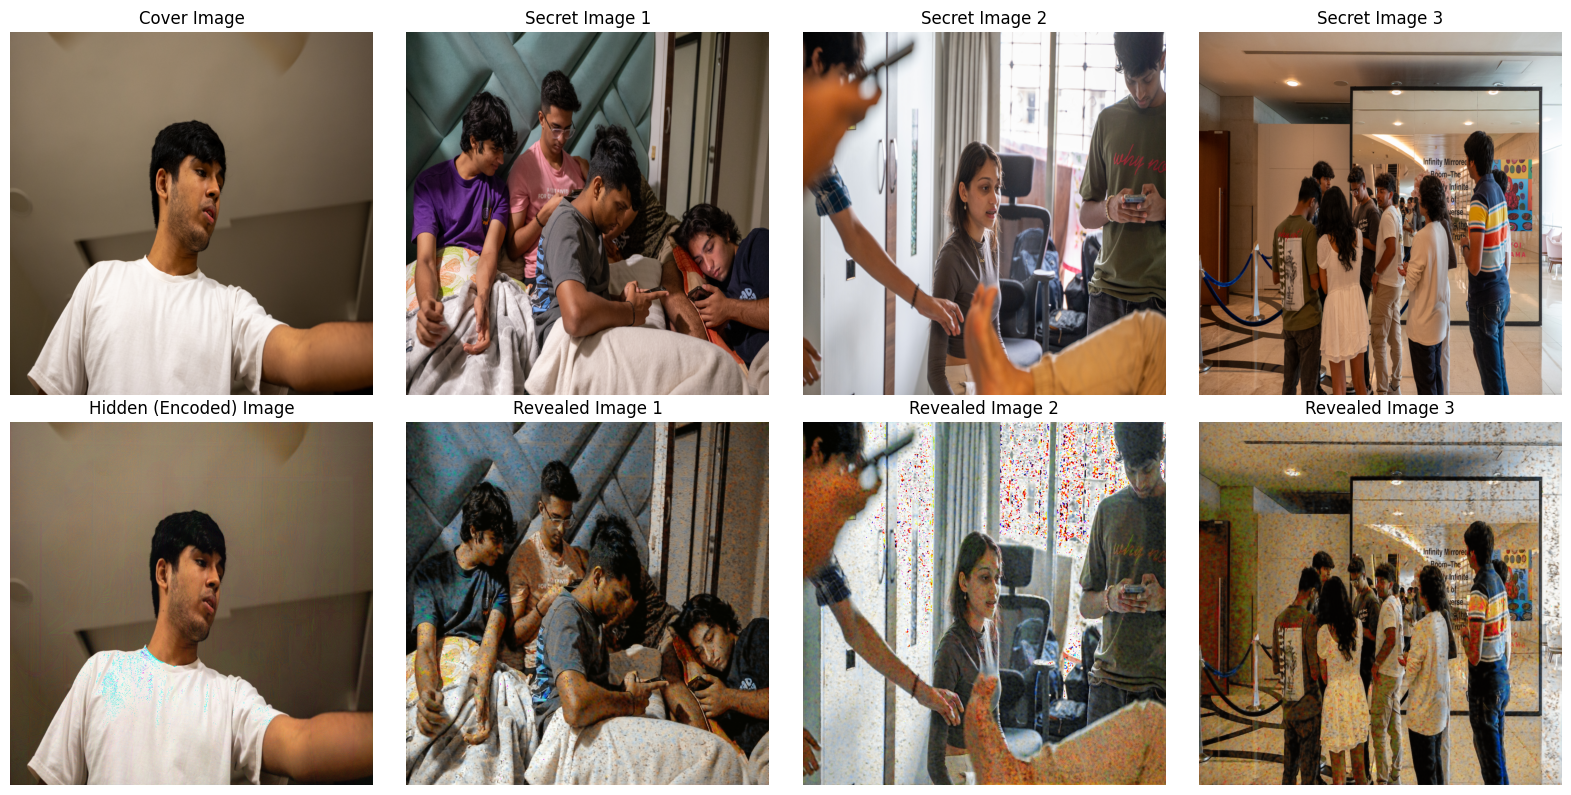

In [58]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Convert each tensor back to a PIL image for visualization
cover_image_pil = TF.to_pil_image(cover_image.squeeze().cpu())  # Remove batch dimension
secret_image_1_pil = TF.to_pil_image(secret_image_1.squeeze().cpu())
secret_image_2_pil = TF.to_pil_image(secret_image_2.squeeze().cpu())
secret_image_3_pil = TF.to_pil_image(secret_image_3.squeeze().cpu())

hidden_image_pil = TF.to_pil_image(hidden_image.squeeze().cpu())
reveal_image_1_pil = TF.to_pil_image(reveal_image_1.squeeze().cpu())
reveal_image_2_pil = TF.to_pil_image(reveal_image_2.squeeze().cpu())
reveal_image_3_pil = TF.to_pil_image(reveal_image_3.squeeze().cpu())

# Display the images in a grid
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

# Original images
ax[0, 0].imshow(cover_image_pil)
ax[0, 0].set_title("Cover Image")
ax[0, 1].imshow(secret_image_1_pil)
ax[0, 1].set_title("Secret Image 1")
ax[0, 2].imshow(secret_image_2_pil)
ax[0, 2].set_title("Secret Image 2")
ax[0, 3].imshow(secret_image_3_pil)
ax[0, 3].set_title("Secret Image 3")

# Encoded and revealed images
ax[1, 0].imshow(hidden_image_pil)
ax[1, 0].set_title("Hidden (Encoded) Image")
ax[1, 1].imshow(reveal_image_1_pil)
ax[1, 1].set_title("Revealed Image 1")
ax[1, 2].imshow(reveal_image_2_pil)
ax[1, 2].set_title("Revealed Image 2")
ax[1, 3].imshow(reveal_image_3_pil)
ax[1, 3].set_title("Revealed Image 3")

# Remove axes for a cleaner look
for a in ax.flatten():
    a.axis("off")

plt.tight_layout()
plt.show()
